In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join('./', fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
data = pd.read_csv("earshells.csv")
data.shape

(3174, 11)

# Data Exploration

In [4]:
# head and tail
pd.concat([data.head(), data.tail()])

subset sex    length  diameter    height  weight_whole  weight_shucked  \
0     train   I  0.349544  0.260194  0.074504      0.179963        0.089707   
1     train   F  0.545249  0.439866  0.134915      0.918132        0.428983   
2      test   F  0.649654  0.544545  0.175080      1.524459        0.590134   
3     train   I  0.500003  0.394566  0.140912      0.621133        0.292336   
4     train   I  0.439268  0.335001  0.110040      0.389429        0.175157   
3169  train   M  0.690490  0.550416  0.180363      1.692044        0.665989   
3170  train   I  0.345047  0.255339  0.095216      0.194550        0.091683   
3171   test   M  0.610011  0.460515  0.159627      0.999663        0.493984   
3172  train   M  0.749726  0.554736  0.214471      2.200778        1.061781   
3173  train   F  0.720167  0.550617  0.180301      1.519483        0.636544   

      weight_viscera  weight_shell  rings      price  
0           0.024760      0.054516    5.0   1.205721  
1           0.201751      0.237840   10.0  18.403463  
2           0.325970      0.495506   10.0  31.455767  
3           0.120165      0.195429    9.0   5.647747  
4           0.083279      0.110899    7.0   1.966989  
3169        0.402392      0.500689   11.0  25.770539  
3170        0.036335      0.055339    6.0   2.599017  
3171        0.197194      0.274957   10.0  13.443444  
3172        0.522346      0.527892   11.0  32.190442  
3173        0.325079      0.434824   10.0  30.086884

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subset          3174 non-null   object 
 1   sex             3174 non-null   object 
 2   length          3174 non-null   float64
 3   diameter        3174 non-null   float64
 4   height          3174 non-null   float64
 5   weight_whole    3174 non-null   float64
 6   weight_shucked  3174 non-null   float64
 7   weight_viscera  3174 non-null   float64
 8   weight_shell    3174 non-null   float64
 9   rings           3143 non-null   float64
 10  price           3143 non-null   float64
dtypes: float64(9), object(2)
memory usage: 272.9+ KB


Saving figure attribute_histogram_plots


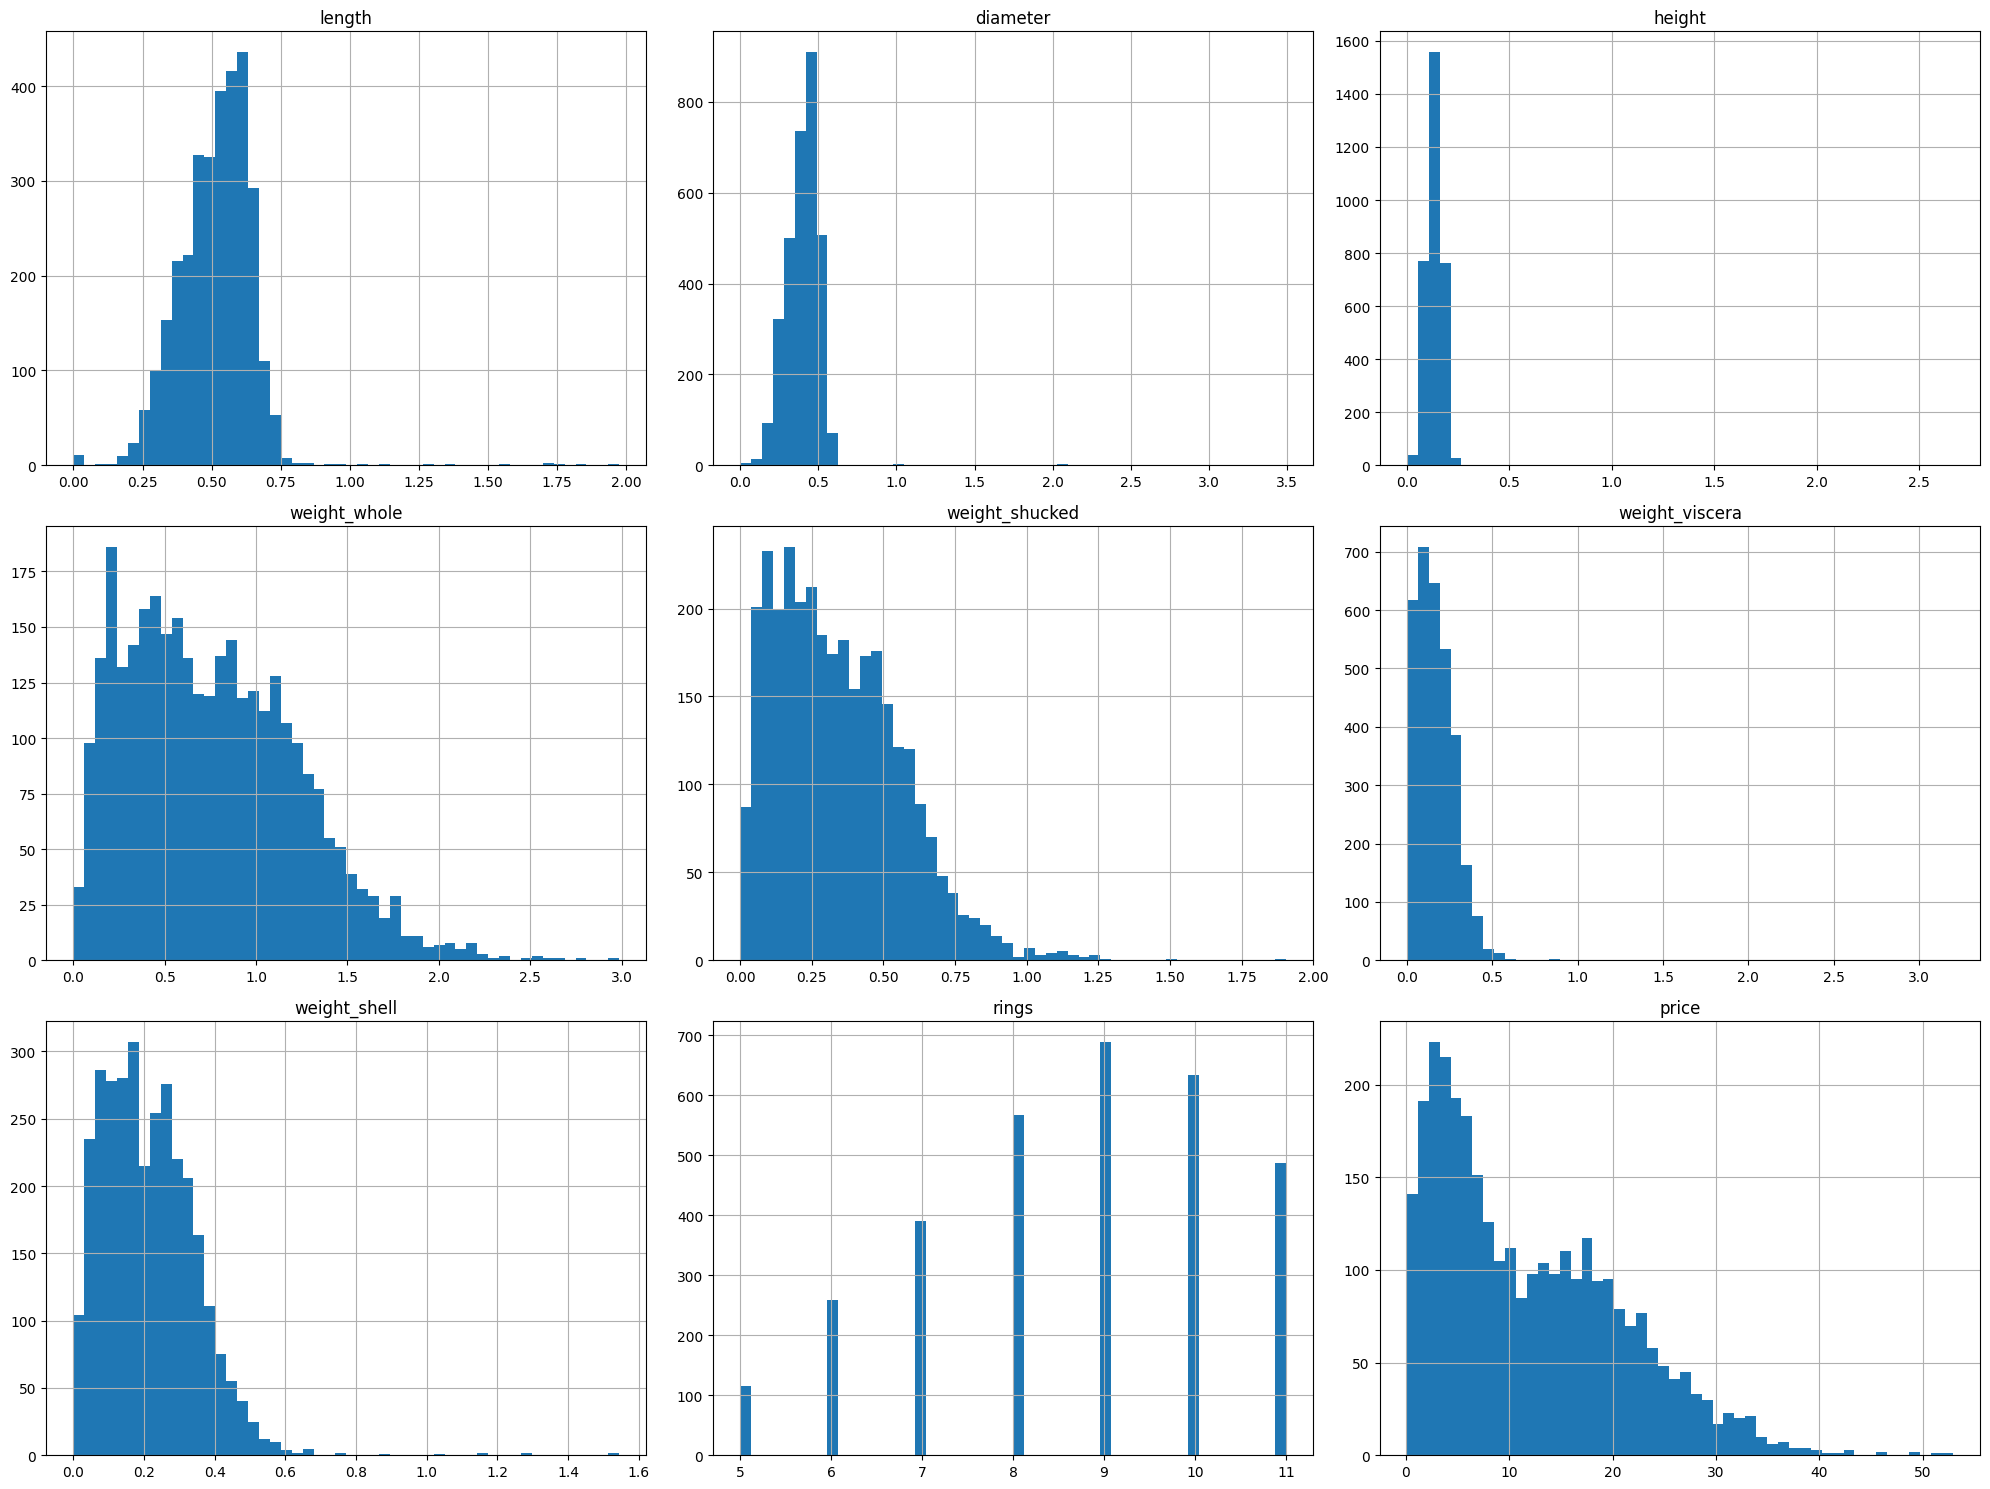

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

<AxesSubplot:>

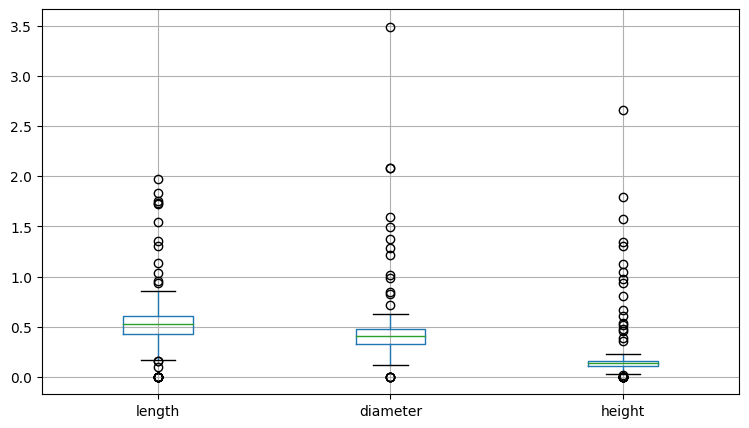

In [7]:
data[["length", "diameter", "height"]].boxplot(figsize=(9,5))

<AxesSubplot:>

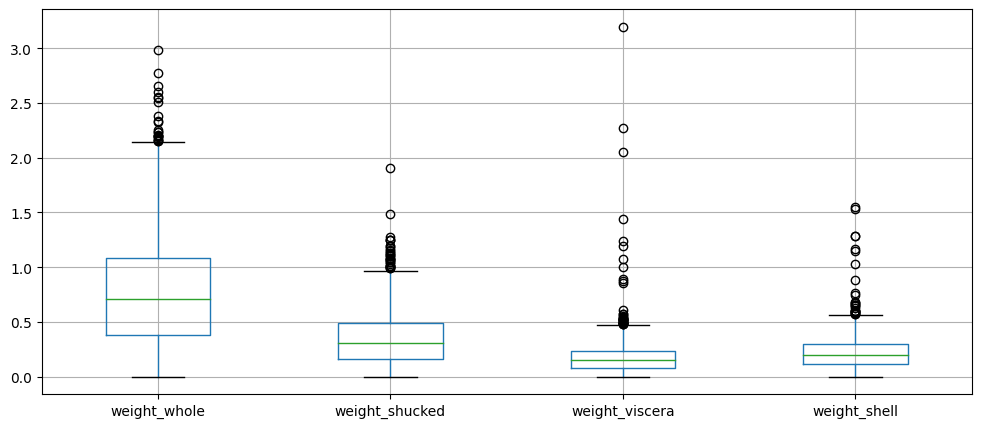

In [8]:
data[["weight_whole", "weight_shucked", "weight_viscera", "weight_shell"]].boxplot(figsize=(12,5))

<AxesSubplot:>

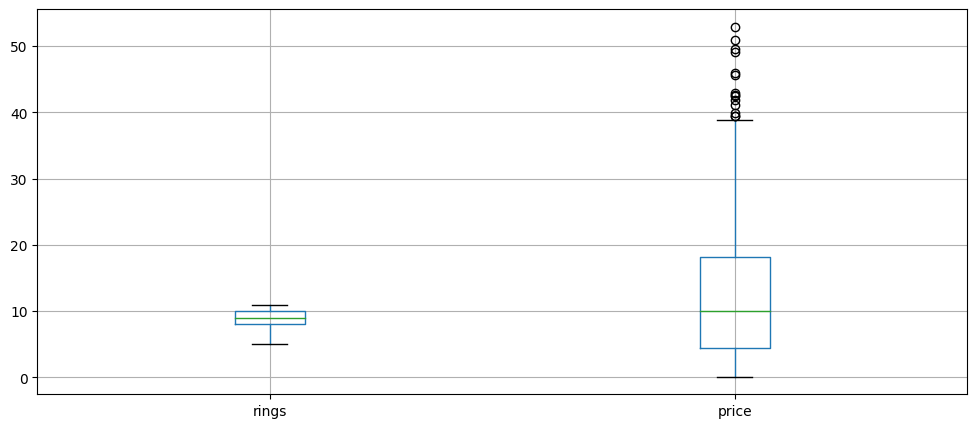

In [9]:
data[["rings", "price"]].boxplot(figsize=(12,5))

Saving figure scatter_matrix_plot


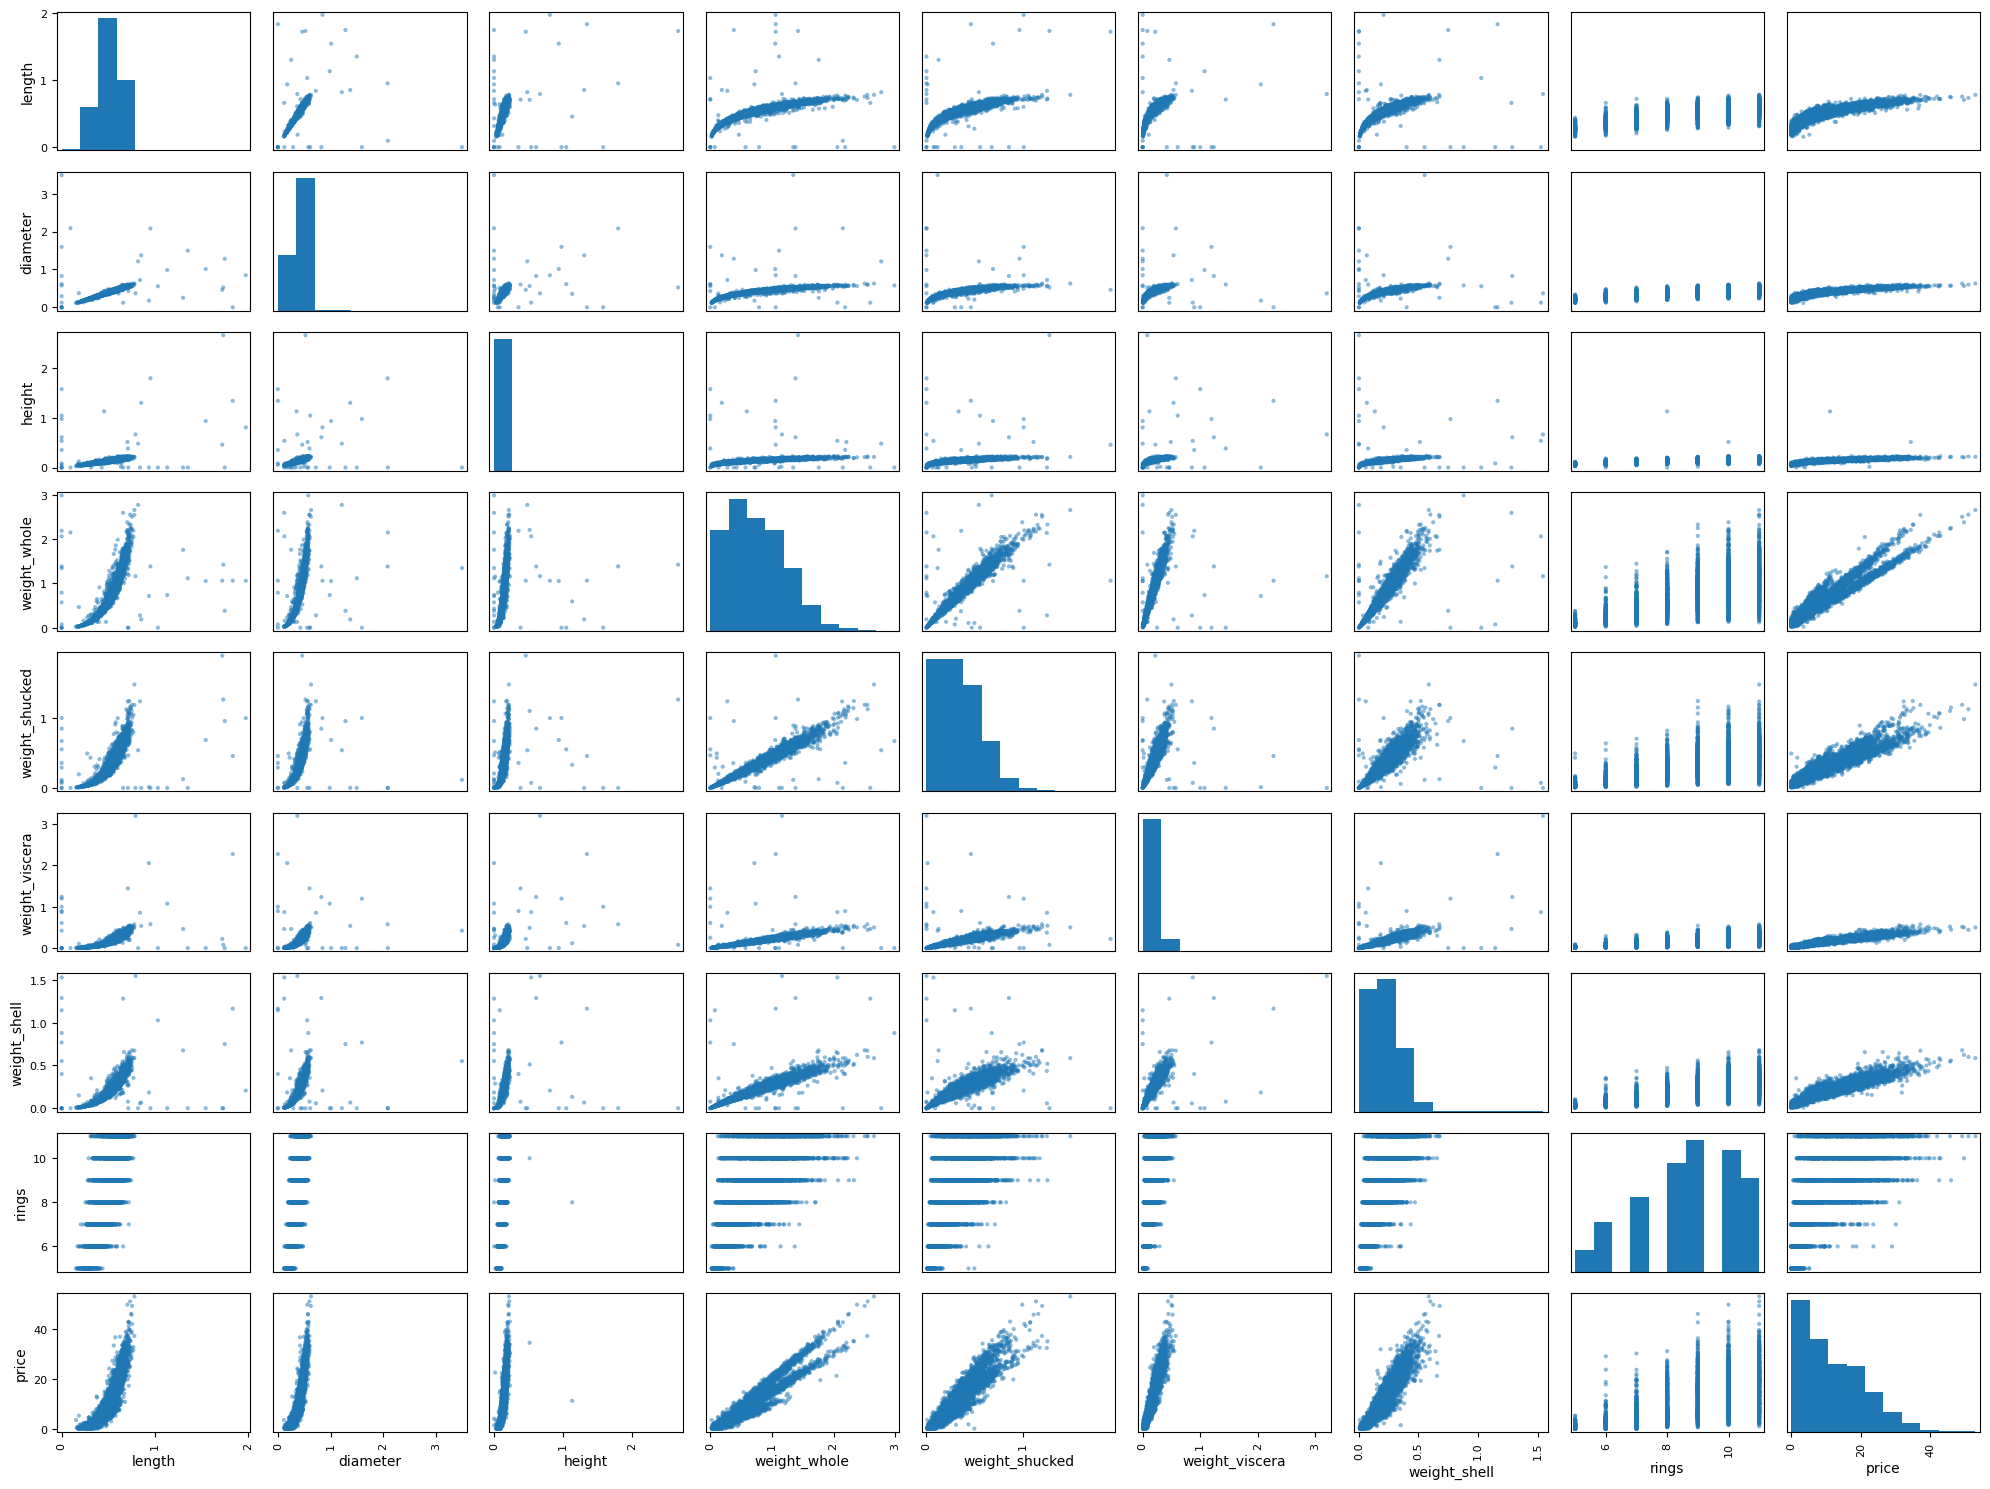

In [10]:
# Looking for correlations

from pandas.plotting import scatter_matrix

attributes = ["length", "diameter", "height",
              "weight_whole", "weight_shucked", "weight_viscera", "weight_shell", "rings", "price"]
scatter_matrix(data[attributes], figsize=(20, 15))
save_fig("scatter_matrix_plot")

# Data Preparation

In [11]:
# visualizing missing data
missing_data = data[data.isnull().any(axis=1)]
missing_data.head()

subset sex    length  diameter    height  weight_whole  weight_shucked  \
214  train   I  0.000000  0.000000  0.053713      0.791070        0.000000   
437  train   M  1.834685  0.000000  1.343274      1.061885        0.459406   
530  train   M  0.936320  0.177193  0.000000      0.716010        0.010560   
531  train   I  0.819914  1.212821  0.480761      2.773814        0.542232   
582  train   M  0.000000  0.613015  1.043975      0.000000        0.554927   

     weight_viscera  weight_shell  rings  price  
214        0.000000      0.000000    NaN    NaN  
437        2.271939      1.164090    NaN    NaN  
530        2.052565      0.184903    NaN    NaN  
531        0.000000      0.000000    NaN    NaN  
582        0.607738      0.000000    NaN    NaN

In [12]:
missing_data.shape

(31, 11)

In [13]:
# drop missing data
data = data.dropna(subset=["rings", "price"]) 
data

subset sex    length  diameter    height  weight_whole  weight_shucked  \
0     train   I  0.349544  0.260194  0.074504      0.179963        0.089707   
1     train   F  0.545249  0.439866  0.134915      0.918132        0.428983   
2      test   F  0.649654  0.544545  0.175080      1.524459        0.590134   
3     train   I  0.500003  0.394566  0.140912      0.621133        0.292336   
4     train   I  0.439268  0.335001  0.110040      0.389429        0.175157   
...     ...  ..       ...       ...       ...           ...             ...   
3169  train   M  0.690490  0.550416  0.180363      1.692044        0.665989   
3170  train   I  0.345047  0.255339  0.095216      0.194550        0.091683   
3171   test   M  0.610011  0.460515  0.159627      0.999663        0.493984   
3172  train   M  0.749726  0.554736  0.214471      2.200778        1.061781   
3173  train   F  0.720167  0.550617  0.180301      1.519483        0.636544   

      weight_viscera  weight_shell  rings      price  
0           0.024760      0.054516    5.0   1.205721  
1           0.201751      0.237840   10.0  18.403463  
2           0.325970      0.495506   10.0  31.455767  
3           0.120165      0.195429    9.0   5.647747  
4           0.083279      0.110899    7.0   1.966989  
...              ...           ...    ...        ...  
3169        0.402392      0.500689   11.0  25.770539  
3170        0.036335      0.055339    6.0   2.599017  
3171        0.197194      0.274957   10.0  13.443444  
3172        0.522346      0.527892   11.0  32.190442  
3173        0.325079      0.434824   10.0  30.086884  

[3143 rows x 11 columns]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3173
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subset          3143 non-null   object 
 1   sex             3143 non-null   object 
 2   length          3143 non-null   float64
 3   diameter        3143 non-null   float64
 4   height          3143 non-null   float64
 5   weight_whole    3143 non-null   float64
 6   weight_shucked  3143 non-null   float64
 7   weight_viscera  3143 non-null   float64
 8   weight_shell    3143 non-null   float64
 9   rings           3143 non-null   float64
 10  price           3143 non-null   float64
dtypes: float64(9), object(2)
memory usage: 294.7+ KB


In [15]:
# train test split
train_data = data[data['subset']=='train']
train_labels = train_data['rings']
train_data = train_data.drop(['rings', 'subset'], axis=1)

In [16]:
test_data = data[data['subset']=='test']
test_labels  = test_data['rings']
test_data = test_data.drop(['rings', 'subset'], axis=1)

In [17]:
train_data

sex    length  diameter    height  weight_whole  weight_shucked  \
0      I  0.349544  0.260194  0.074504      0.179963        0.089707   
1      F  0.545249  0.439866  0.134915      0.918132        0.428983   
3      I  0.500003  0.394566  0.140912      0.621133        0.292336   
4      I  0.439268  0.335001  0.110040      0.389429        0.175157   
5      I  0.294596  0.220013  0.084899      0.129350        0.058167   
...   ..       ...       ...       ...           ...             ...   
3168   F  0.645029  0.515352  0.174978      1.545356        0.703173   
3169   M  0.690490  0.550416  0.180363      1.692044        0.665989   
3170   I  0.345047  0.255339  0.095216      0.194550        0.091683   
3172   M  0.749726  0.554736  0.214471      2.200778        1.061781   
3173   F  0.720167  0.550617  0.180301      1.519483        0.636544   

      weight_viscera  weight_shell      price  
0           0.024760      0.054516   1.205721  
1           0.201751      0.237840  18.403463  
3           0.120165      0.195429   5.647747  
4           0.083279      0.110899   1.966989  
5           0.027437      0.036809   0.229251  
...              ...           ...        ...  
3168        0.364311      0.415142  30.824711  
3169        0.402392      0.500689  25.770539  
3170        0.036335      0.055339   2.599017  
3172        0.522346      0.527892  32.190442  
3173        0.325079      0.434824  30.086884  

[2828 rows x 9 columns]

In [18]:
train_labels

0        5.0
1       10.0
3        9.0
4        7.0
5        5.0
        ... 
3168    10.0
3169    11.0
3170     6.0
3172    11.0
3173    10.0
Name: rings, Length: 2828, dtype: float64

In [19]:
test_data

sex    length  diameter    height  weight_whole  weight_shucked  \
2      F  0.649654  0.544545  0.175080      1.524459        0.590134   
9      I  0.379859  0.290154  0.100127      0.236797        0.107936   
13     I  0.485215  0.390203  0.124914      0.590828        0.287113   
15     I  0.404994  0.309877  0.109992      0.910528        0.415669   
16     F  0.574861  0.470001  0.155283      1.116044        0.509848   
...   ..       ...       ...       ...           ...             ...   
3114   I  0.360148  0.269920  0.090065      0.220012        0.097578   
3119   F  0.544757  0.409774  0.125041      0.654143        0.294042   
3148   I  0.265201  0.195512  0.054835      0.084111        0.036093   
3156   F  0.650096  0.524837  0.190435      1.385397        0.888044   
3171   M  0.610011  0.460515  0.159627      0.999663        0.493984   

      weight_viscera  weight_shell      price  
2           0.325970      0.495506  31.455767  
9           0.039838      0.082200   2.284661  
13          0.141228      0.119952   6.301808  
15          0.208048      0.099344   8.615837  
16          0.238680      0.339308  22.108901  
...              ...           ...        ...  
3114        0.040150      0.065173   1.590018  
3119        0.130547      0.205114  11.165964  
3148        0.017673      0.025267   0.100000  
3156        0.308514      0.404633  28.246706  
3171        0.197194      0.274957  13.443444  

[315 rows x 9 columns]

In [20]:
test_labels

2       10.0
9        6.0
13       9.0
15       8.0
16      10.0
        ... 
3114     6.0
3119    10.0
3148     7.0
3156    11.0
3171    10.0
Name: rings, Length: 315, dtype: float64

In [21]:
data_cleaned = data.copy()
data = train_data
data_labels = train_labels

In [22]:
data.shape

(2828, 9)

In [23]:
data_cat = data[['sex']]
data_cat.value_counts()

sex
I      1068
M       978
F       782
dtype: int64

<AxesSubplot:>

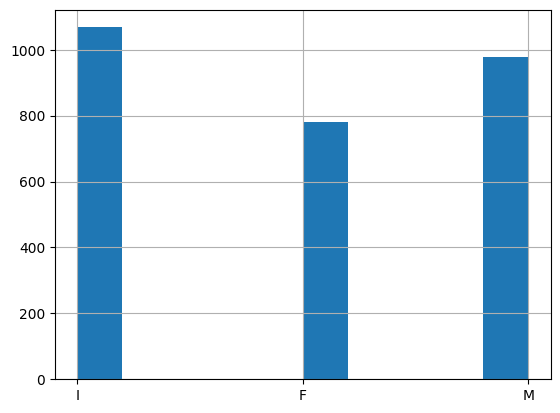

In [24]:
data_cat['sex'].hist()

In [25]:
data_num = data.select_dtypes(include=[np.number])

In [26]:
# OneHotEncoder for categorical variables

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<2828x3 sparse matrix of type '<class 'numpy.float64'>'
	with 2828 stored elements in Compressed Sparse Row format>

In [27]:
data_cat_1hot.toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [28]:
cat_encoder.categories_

[array(['F', 'I', 'M'], dtype=object)]

## Transformation Pipelines

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attribs = list(data_num)
cat_attribs = ["sex"]

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)
data_num_tr = num_pipeline.fit_transform(data_num)

In [30]:
data_prepared

array([[-1.4004509 , -1.42890207, -1.44870354, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.2811492 ,  0.44758004,  0.0194964 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.10762753, -0.02552293,  0.16526199, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.43909051, -1.47961135, -0.94532194, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.03812694,  1.64728084,  1.95301751, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.78414148,  1.60426786,  1.12254119, ...,  1.        ,
         0.        ,  0.        ]])

In [31]:
data_prepared.shape

(2828, 11)

In [32]:
data_labels.shape

(2828,)

# Model Training, Selection and Evaluation

### Model Training : Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [34]:
# let's try the full preprocessing pipeline on a few training instances
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
some_data_predictions = lin_reg.predict(some_data_prepared)

print("Predictions:", some_data_predictions )

Predictions: [6.74718445 9.10691432 8.4862178  7.8022743  6.41745867]


In [35]:
print("Labels:", list(some_labels))

Labels: [5.0, 10.0, 9.0, 7.0, 5.0]


In [36]:
print("Ceiling Preds:", np.ceil(some_data_predictions))

Ceiling Preds: [ 7. 10.  9.  8.  7.]


In [37]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
data_ceiled_predictions = np.ceil(data_predictions)

In [38]:
# mean_squared_error
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.101921901088993

In [39]:
# with ceiled predictions
lin_mse = mean_squared_error(data_labels, data_ceiled_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.2480536473436579

In [40]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(data_labels, data_predictions)
lin_mae

0.8796797538032941

In [41]:
lin_mae = mean_absolute_error(data_labels, data_ceiled_predictions)
lin_mae

0.9664073550212164

### Model Training : Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(random_state=42)

In [43]:
data_predictions = tree_reg.predict(data_prepared)
data_ceiled_predictions = np.ceil(data_predictions)

In [44]:
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [45]:
tree_mse = mean_squared_error(data_labels, data_ceiled_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [46]:
# mean absolute error
tree_mae = mean_absolute_error(data_labels, data_predictions)
tree_mae

0.0

In [47]:
tree_mae = mean_absolute_error(data_labels, data_ceiled_predictions)
tree_mae

0.0

### Model Training : RandomForest

In [48]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data_prepared, data_labels)

RandomForestRegressor(random_state=42)

In [49]:
data_predictions = forest_reg.predict(data_prepared)
data_ceiled_predictions = np.ceil(data_predictions)

In [50]:
# mean squared error
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.40472645170190397

In [51]:
forest_mse = mean_squared_error(data_labels, data_ceiled_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.7357798545368658

In [52]:
# mean absolute error
forest_mae = mean_absolute_error(data_labels, data_predictions)
forest_mae

0.32078854314002825

In [53]:
forest_mae = mean_absolute_error(data_labels, data_ceiled_predictions)
forest_mae

0.5279349363507779

### Model Training : XGBoost

In [54]:
from xgboost import XGBRegressor

xgboost_reg = XGBRegressor()
xgboost_reg.fit(data_prepared, data_labels)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [55]:
data_predictions = xgboost_reg.predict(data_prepared)
data_ceiled_predictions = np.ceil(data_predictions)

In [56]:
# mean squared error
xgboost_mse = mean_squared_error(data_labels, data_predictions)
xgboost_rmse = np.sqrt(xgboost_mse)
xgboost_rmse

0.3570260330421798

In [57]:
xgboost_mse = mean_squared_error(data_labels, data_ceiled_predictions)
xgboost_rmse = np.sqrt(xgboost_mse)
xgboost_rmse

0.7365003833739956

In [58]:
# mean absolute error
xgboost_mae = mean_absolute_error(data_labels, data_predictions)
xgboost_mae

0.2668685270670954

In [59]:
xgboost_mae = mean_absolute_error(data_labels, data_ceiled_predictions)
xgboost_mae

0.5297029702970297

# Cross-Validation for Model Evaluation and Selection

### Linear Regression Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [61]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [1.14101218 1.1322002  1.11804401 1.13858387 1.09626698 1.12600865
 1.0745067  1.13135597 1.12556369 1.05957494]
Mean: 1.1143117188157177
Standard deviation: 0.026638465931973276


### Decision Tree Regressor Cross Validation

In [62]:
scores = cross_val_score(tree_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
display_scores(scores)

Scores: [1.39281346 1.52713964 1.52366491 1.49675739 1.51085589 1.44510872
 1.42665192 1.57722304 1.42171607 1.41671881]
Mean: 1.473864985360589
Standard deviation: 0.05788267266880209


### RandomForest Regressor Cross Validation

In [63]:
scores = cross_val_score(forest_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
display_scores(scores)

Scores: [1.08808533 1.12967083 1.09765828 1.12444867 1.04513394 1.11338214
 1.08641531 1.13169063 1.03358822 1.0237175 ]
Mean: 1.087379084703208
Standard deviation: 0.03826279380114641


### XGBoost Regressor Cross Validation

In [64]:
scores = cross_val_score(xgboost_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
display_scores(scores)

Scores: [1.17457825 1.14924083 1.11807256 1.20824912 1.17932904 1.11694177
 1.14694802 1.17675965 1.08142303 1.05274294]
Mean: 1.1404285217232744
Standard deviation: 0.0457613650122514


### SVM Regression Cross Validation

In [65]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data_prepared, data_labels)

SVR(kernel='linear')

In [66]:
scores = cross_val_score(svm_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)
display_scores(scores)

Scores: [1.16188267 1.13468118 1.11754039 1.14481237 1.11102835 1.14583006
 1.0599961  1.13068019 1.13375715 1.0629383 ]
Mean: 1.1203146757757596
Standard deviation: 0.032400496625588686


# Model Evaluation on Test Data

In [67]:
test_data_prepared = full_pipeline.transform(test_data)

### RandomForest Evaluation on Test Data

In [68]:
test_data_predictions = forest_reg.predict(test_data_prepared)
test_data_ceiled_predictions = np.ceil(test_data_predictions)

# mean squared error
forest_mse = mean_squared_error(test_labels, test_data_ceiled_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.2215005084172057

In [69]:
# mean absolute error
forest_mae = mean_absolute_error(test_labels, test_data_ceiled_predictions)
forest_mae

0.9333333333333333

### SVM Evaluation on Test Data

In [70]:
test_data_predictions = np.ceil(svm_reg.predict(test_data_prepared))

In [71]:
# mean squared error
svm_mse = mean_squared_error(test_labels, test_data_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

1.2331402680291161

In [72]:
# mean absolute error
svm_mae = mean_absolute_error(test_labels, test_data_predictions)
svm_mae

0.9365079365079365

# Fine-Tune the Selected Model

### Grid Search

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 24 (3×4×2) combinations of hyperparameters
    {'n_estimators': [5, 10, 40], 'max_features': [2, 4, 6, 8], 'criterion': ['squared_error','absolute_error']},
    # then try 6 (2×3×2) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'criterion': ['squared_error','absolute_error']},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (24+12)*5=180 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'criterion': ['squared_error', 'absolute_error'],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [5, 10, 40]},
                         {'bootstrap': [False],
                          'criterion': ['squared_error', 'absolute_error'],
                          'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [74]:
grid_search.best_params_

{'criterion': 'squared_error', 'max_features': 2, 'n_estimators': 40}

In [88]:
grid_search.score(data_prepared, data_labels)

-0.1708168316831683

In [76]:
data_predictions = grid_search.predict(data_prepared)
gs_mse = mean_squared_error(data_labels, data_predictions)
gs_rmse = np.sqrt(gs_mse)
gs_rmse

0.41329992944974997

In [87]:
forest_reg = RandomForestRegressor(random_state=42, **grid_search.best_params_)
forest_reg.fit(data_prepared, data_labels)
data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.41329992944974997

### Randomized Search

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(data_prepared, data_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96a776c190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f96a7746dc0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [90]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.0825324932565934 {'max_features': 7, 'n_estimators': 180}
1.1095260576119037 {'max_features': 5, 'n_estimators': 15}
1.082452256958754 {'max_features': 3, 'n_estimators': 72}
1.100421584883308 {'max_features': 5, 'n_estimators': 21}
1.0844750344060161 {'max_features': 7, 'n_estimators': 122}
1.0821682603997411 {'max_features': 3, 'n_estimators': 75}
1.082227354138126 {'max_features': 3, 'n_estimators': 88}
1.0796517129705494 {'max_features': 5, 'n_estimators': 100}
1.0793058357005292 {'max_features': 3, 'n_estimators': 150}
1.320195904754356 {'max_features': 5, 'n_estimators': 2}


### Evaluate the Model on Test Data

In [93]:
final_model = grid_search.best_estimator_
test_data_predictions = final_model.predict(test_data_prepared)
final_mse = mean_squared_error(test_labels, test_data_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1.0969944509416742

In [95]:
test_data_predictions = np.ceil(final_model.predict(test_data_prepared))
final_mse = mean_squared_error(test_labels, test_data_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1.2136786531103994